<a href="https://colab.research.google.com/github/dwijamahardika/Genetic_Algoritm_Implementation/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
import random
import math

**Random Seed**

In [ ]:
# digunakan agar frekuensi random tetap dan menghasilkan hasil yang sama
seed = 100000
random.seed(seed)


**Making of Chromosome in Binary Representations**

In [ ]:
def generate_krom(n):
  krom = [] # pembuatan list kromosom
  for i in range(n):
    krom.append(random.randint(0,1))
  return krom

**Making of Population in Binary Representations**

In [ ]:
def generate_pop(len_krom, n):
    #input : len_krom = Panjang list kromosom, n = Jumlah kromosom pada populasi.
    #output: Kromosom dalam representasi biner.
    populasi = []
    for i in range(n):
      krom = generate_krom(len_krom)
      populasi.append(krom)
    return populasi

**Decode Kromosom in Binary Representations**

In [ ]:
def decode_krom(kromosom, batas_x, batas_y):
    # Decode Kromosom menghasilkan x dan y
    # membagi dua list kromosom
    mid_krom = len(kromosom) // 2
    # perhitungan terkiri pada rumus
    kiri = 0
    krom_x = kromosom[:mid_krom]
    for i in range(1, mid_krom + 1):
        kiri += krom_x[i-1] * (2 ** -i)
    # perhitungan terkanan pada rumus
    kanan = 0
    krom_y = kromosom[mid_krom:]
    for i in range(1, mid_krom + 1):
        kanan += krom_y[i-1] * (2 ** -i)
    # hitung bagian bawah rumus
    bawah = sum([2 ** -(i) for i in range(1, mid_krom + 1)])
    # hitung x dan y
    x = batas_x["min"] + (kiri * (batas_x["max"] - batas_x["min"]) / bawah)
    y = batas_y["min"] + (kanan * (batas_y["max"] - batas_y["min"]) / bawah)

    return x, y

**Fitness**

In [ ]:
def fitness(x, y):
    # nilai maximum dari fungsi
    return f(x, y)

**Parent Selection using Roulette Wheel Selection**

In [ ]:
def rws(pop, fitness_pop):
    #  normalitaion fitness value
    min_ = min(fitness_pop)
    max_ = max(fitness_pop)
    for i in range(len(pop)):
        fitness_pop[i] = (fitness_pop[i] - min_) / (max_ - min_) 
    total = sum(fitness_pop)
    # roulette wheel
    parent = []
    while len(parent) != 2:
        range_ = random.random()
        i = -1
        while range_ > 0:
            i = i + 1
            range_ = range_ - (fitness_pop[i] / total)
        parent.append(pop[i])
    return parent

**Parent Selection using Tournament Selection**

In [ ]:
def tournament_selection(pop, fitness_pop):
  # tournament selection
  parent = random.sample(list(zip(pop,fitness_pop)),random.randint(2, n_pop))
  parent = sorted(parent,key= lambda k:k[1],reverse=True)
  return [parent[0][0], parent[1][0]]


**Crossover using Two-Points**

In [ ]:
def crossover(parent):
    # random dua titik potong
    cross_point1 = random.randint(0, len(parent[0]))
    cross_point2 = random.randint(cross_point1, len(parent[0]))
    # persilangan dalam membuat dua child
    child = [0, 0]
    child[0] = parent[0][:cross_point1] + parent[1][cross_point1:cross_point2] + parent[0][cross_point2:]
    child[1] = parent[1][:cross_point1] + parent[0][cross_point1:cross_point2] + parent[1][cross_point2:]
    return child

**Mutation**

In [ ]:
def mutation(child, pm):
    #mutation for error stimulation
    for i in range(2):
        for j in range(len(child[0])):
            if random.random() <= pm:
                child[i][j] = [0, 1][ not child[i][j] ]
    return child

**Function**

In [ ]:
def f(x, y):
    return ((math.cos(x**2) * math.sin(y**2)) + (x + y))

**Global Variable**

In [ ]:
pc = 0.7 #probabilitas crossover
pm = 0.1 #probabilitas mutasi
n_elitisme = 2 #banyaknya kromosom terbaik yang diambil
n_pop, len_krom =20, 10 #banyaknya populasi dan panjang kromosom
gen = 30 #banyaknya gen yang akan dibuat
best = [] #variabel untuk fitness terbaik
pop = generate_pop(len_krom, n_pop) #list populasi
batas_x = {"min" : -1, "max" : 2} #batasan untuk x
batas_y = {"min" : -1, "max" : 1} #batasan untuk y

**Main Function**

In [ ]:
for i in range(gen):
    fitness_pop = []
    for kromosom in pop:
        x, y = decode_krom(kromosom, batas_x, batas_y)
        fitness_pop.append(fitness(x, y))
    best.append( max(fitness_pop) ) #fitness terbaik lokal ditambahkan dalam list fitness terbaik global
    sorted_pop = [k for _, k in sorted(zip(fitness_pop, pop), reverse=True)] #pengurutan fitness dari terkuat hingga terlemah
    new_pop = sorted_pop[:n_elitisme] #menjalankan elitisme
    #melihat perkembangan solusi yang didapatkan per-generasi
    if (i+1)%3 == 0:
      print(f"Generasi ke-{i + 1}: ")
      print(f"Best: {max(best)}; Kromosom Terbaik: {new_pop[0]} ; nilai x,y: {decode_krom(new_pop[0], batas_x, batas_y)}")
      print()
    while len(new_pop) <= n_pop:
        #seleksi orang tua
        parent = tournament_selection(pop, fitness_pop)
        # crossover dan mutasi
        if random.random() <= pc:
            child = mutation(crossover(parent), pm)
        else:
            child = parent + []
        # menambahkan populasi baru
        new_pop = new_pop + child
    pop = new_pop + []
print("================================== Best Generation ==================================")
print(f"Best Fitness: {max(best)}") #best fitness sampai generasi terakhir
print(f"Kromosom Terbaik: {pop[0]}") #kromosom terbaik
print(f"Nilai x dan y: {decode_krom(pop[0],batas_x,batas_y)}") # nilai x dan y hasil dekode kromosom terbaik

Generasi ke-3: 
Best: 2.4337294628650743; Kromosom Terbaik: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0] ; nilai x,y: (2.0, 0.935483870967742)

Generasi ke-6: 
Best: 2.4499778586384973; Kromosom Terbaik: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ; nilai x,y: (2.0, 1.0)

Generasi ke-9: 
Best: 2.4499778586384973; Kromosom Terbaik: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ; nilai x,y: (2.0, 1.0)

Generasi ke-12: 
Best: 2.4804368980667126; Kromosom Terbaik: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1] ; nilai x,y: (0.8387096774193548, 1.0)

Generasi ke-15: 
Best: 2.4804368980667126; Kromosom Terbaik: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1] ; nilai x,y: (0.8387096774193548, 1.0)

Generasi ke-18: 
Best: 2.4804368980667126; Kromosom Terbaik: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1] ; nilai x,y: (0.8387096774193548, 1.0)

Generasi ke-21: 
Best: 2.4804368980667126; Kromosom Terbaik: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1] ; nilai x,y: (0.8387096774193548, 1.0)

Generasi ke-24: 
Best: 2.4804368980667126; Kromosom Terbaik: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1] ; nilai x,y: (0.83

**Growth of Fitness Visualization**

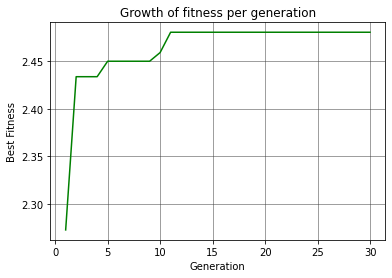

In [ ]:
import matplotlib.pyplot as plt
plt.grid(linestyle="-", linewidth=0.5, color='.25')
# melihat pertumbuhan fitness terbaik
plt.plot(range(1, gen + 1), best,'#008000')
plt.title("Growth of fitness per generation")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.show()